<a href="https://colab.research.google.com/github/vaniajohn/edu-R/blob/main/R_zachet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
df <- read.csv("salaries_clean.csv",                 # File name or full path of the file
         header = TRUE,        # Whether to read the header or not
         sep = ";" ,           # Separator of the values
         )
df


index,employer_name,location_country,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,annual_bonus,submitted_at
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,opower,US,systems engineer,Engineering,,13,2.0,125000,0,3/21/16 12:58
1,walmart,US,senior developer,Software,Senior,15,8.0,65000,5000,3/21/16 12:58
2,vertical knowledge,US,software engineer,Software,,4,1.0,86000,6000,3/21/16 12:59
3,netapp,,mts,Other,,4,0.0,105000,8500,3/21/16 13:00
4,apple,,software engineer,Software,,4,3.0,110000,7000,3/21/16 13:02
5,casino,US,it technician,Other,,5,1.5,40000,500,3/21/16 13:03
6,tetra tech,US,lead interviewer,Other,,4,2.5,45000,1500,3/21/16 13:03
7,knewton,US,senior software engineer,Software,Senior,8,2.0,135000,0,3/21/16 13:03
8,amplify,,software engineer,Software,,2,1.0,105000,47000,3/21/16 13:04


In [2]:
df$location_country <- ifelse(df$location_country=='', 'World', df$location_country)
df$job_title_rank <- ifelse(df$job_title_rank=='', 'Doest_matter', df$job_title_rank)
df$annual_bonus <- ifelse(is.na(df$annual_bonus), 0, df$annual_bonus)
df$total_experience_years <- ifelse(is.na(df$total_experience_years), 0, df$total_experience_years)
df

index,employer_name,location_country,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,annual_bonus,submitted_at
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,opower,US,systems engineer,Engineering,Doest_matter,13,2.0,125000,0,3/21/16 12:58
1,walmart,US,senior developer,Software,Senior,15,8.0,65000,5000,3/21/16 12:58
2,vertical knowledge,US,software engineer,Software,Doest_matter,4,1.0,86000,6000,3/21/16 12:59
3,netapp,World,mts,Other,Doest_matter,4,0.0,105000,8500,3/21/16 13:00
4,apple,World,software engineer,Software,Doest_matter,4,3.0,110000,7000,3/21/16 13:02
5,casino,US,it technician,Other,Doest_matter,5,1.5,40000,500,3/21/16 13:03
6,tetra tech,US,lead interviewer,Other,Doest_matter,4,2.5,45000,1500,3/21/16 13:03
7,knewton,US,senior software engineer,Software,Senior,8,2.0,135000,0,3/21/16 13:03
8,amplify,World,software engineer,Software,Doest_matter,2,1.0,105000,47000,3/21/16 13:04


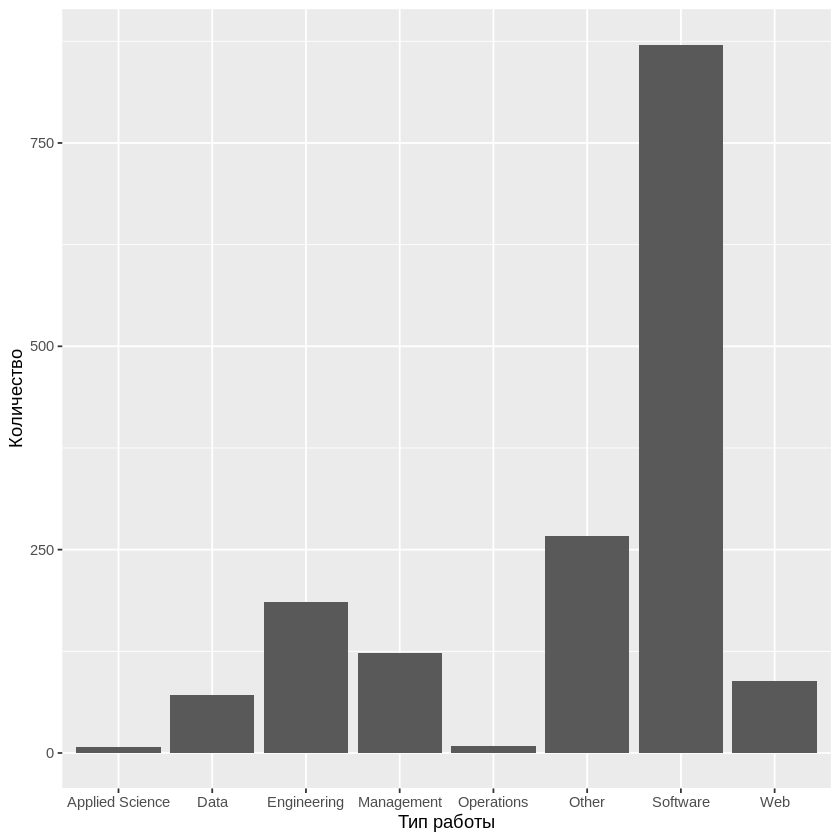

In [3]:

library(ggplot2)

# создаем таблицу с количеством включений каждого типа работы
job_counts <- table(df$job_title_category)

# создаем график
ggplot(data = data.frame(job = names(job_counts), count = as.numeric(job_counts)),
       aes(x = job, y = count)) +
  geom_col() +
  xlab("Тип работы") +
  ylab("Количество")
options(repr.plot.width=17, repr.plot.height=12)

`geom_smooth()` using formula = 'y ~ x'


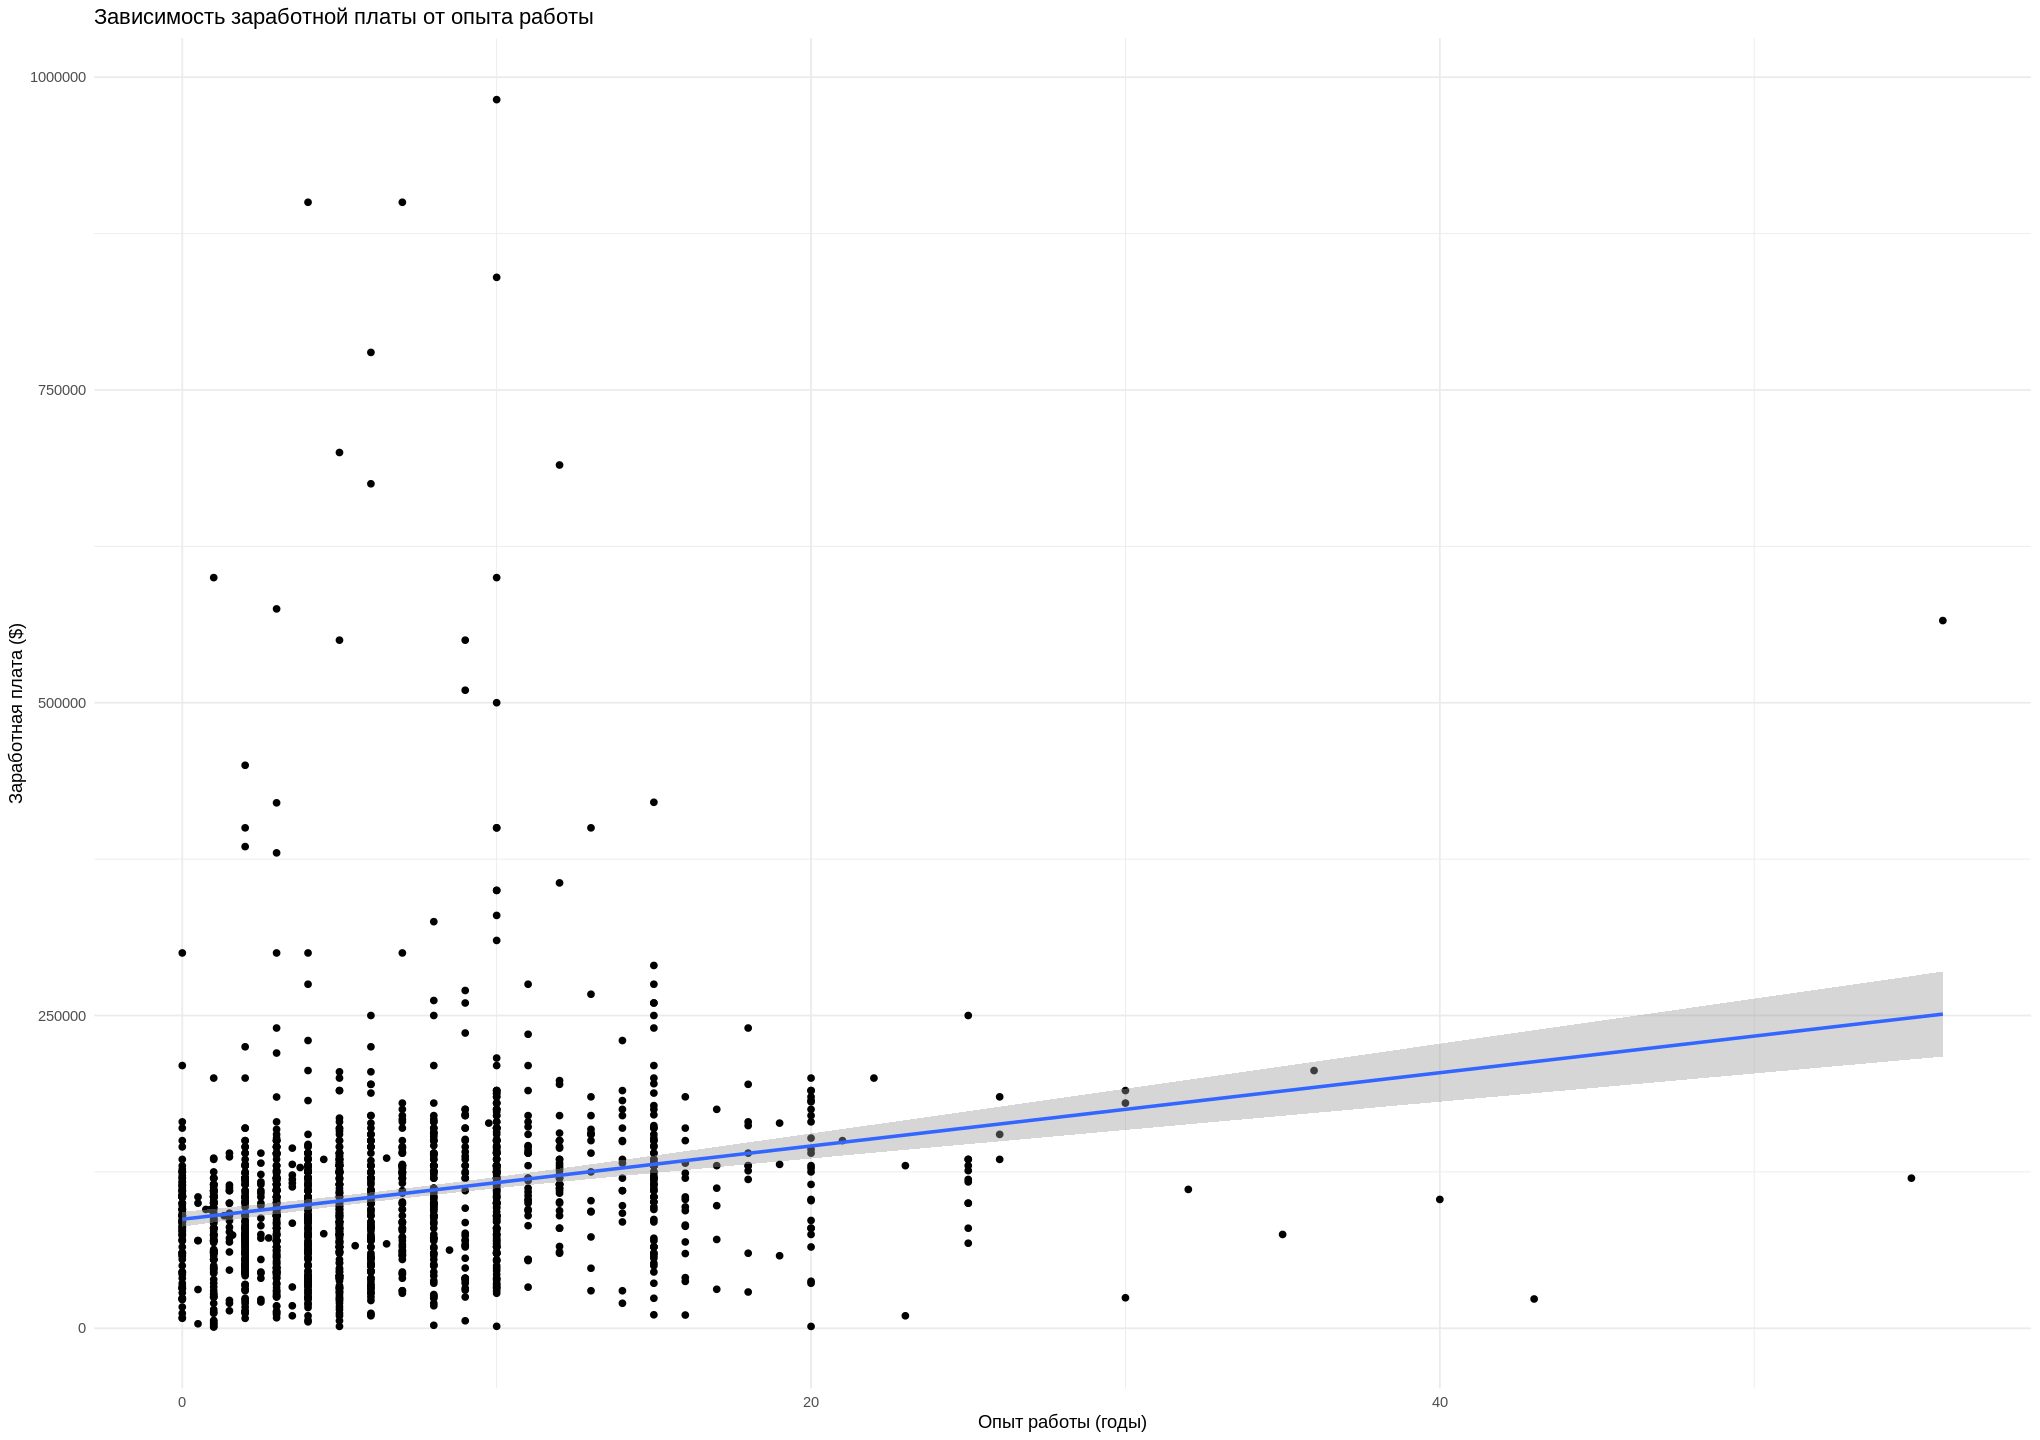

In [4]:
ggplot(df, aes(x = total_experience_years, y = annual_base_pay)) +
  geom_point() + # Точечный график
  geom_smooth(method = "lm") + # Линия регрессии (линия тренда)
  labs(title = "Зависимость заработной платы от опыта работы", x = "Опыт работы (годы)", y = "Заработная плата ($)") +
  theme_minimal()

Удалим выбросы и потом смотрим наскоько лучше стало

In [5]:
# # определение границ интервала
# mean_value <- mean(df$annual_base_pay)
# sd_value <- sd(df$annual_base_pay)
# lower_limit <- mean_value - 3 * sd_value
# upper_limit <- mean_value + 100000 * sd_value

# # удаление выбросов
# df <- df[df$annual_base_pay > lower_limit & df$annual_base_pay < upper_limit, ]

#Делитнем выбросы по ЗП
Q1 <- quantile(df$annual_base_pay, 0.25)
Q3 <- quantile(df$annual_base_pay, 0.75)     #это метод межквартильного расстояния (IQR)
IQR <- Q3 - Q1
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Удаление выбросов
df <- df[df$annual_base_pay >= lower_bound & df$annual_base_pay <= upper_bound, ]


In [6]:
#Делитнем выбросы по опыту
Q1 <- quantile(df$total_experience_years, 0.25)
Q3 <- quantile(df$total_experience_years, 0.75)     #это метод межквартильного расстояния (IQR)
IQR <- Q3 - Q1
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Удаление выбросов
df <- df[df$total_experience_years >= lower_bound & df$total_experience_years <= upper_bound, ]

`geom_smooth()` using formula = 'y ~ x'


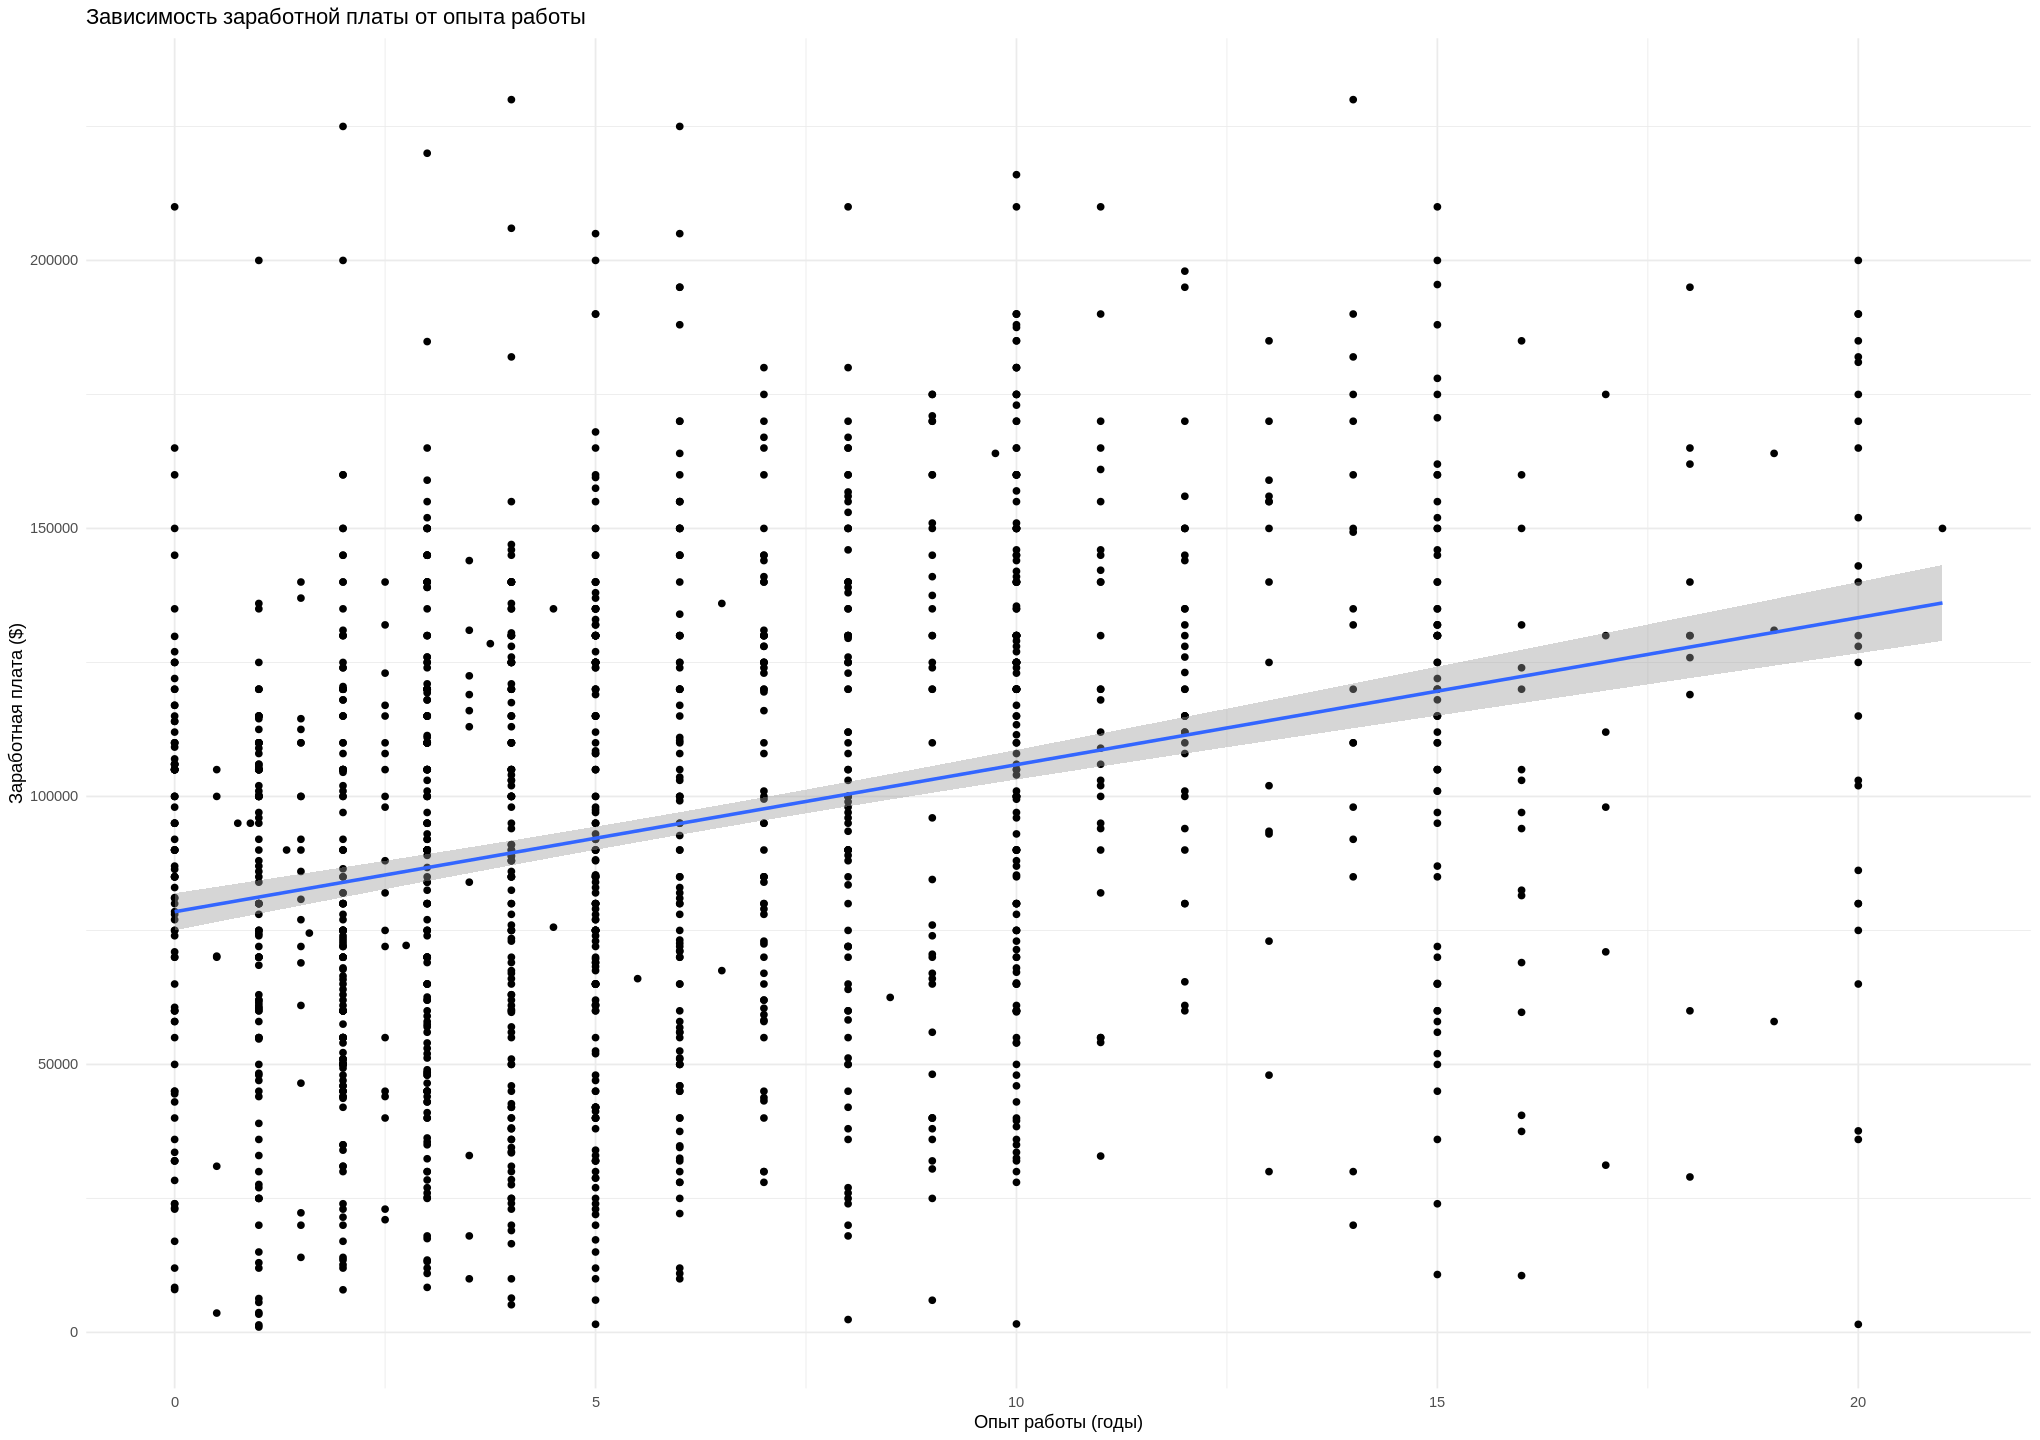

In [7]:
ggplot(df, aes(x = total_experience_years, y = annual_base_pay)) +
  geom_point() + # Точечный график
  geom_smooth(method = "lm") + # Линия регрессии (линия тренда)
  labs(title = "Зависимость заработной платы от опыта работы", x = "Опыт работы (годы)", y = "Заработная плата ($)") +
  theme_minimal()

In [11]:
#install.packages("h2o")
library(h2o)


h2o.init()

# Загружаем данные
data <- as.h2o(df)


target <- "annual_base_pay"

# Разделяем на обучающую и тестовую выборки
split <- h2o.splitFrame(data, ratios = c(0.79, 0.2))
train <- split[[1]]
test <- split[[2]]



automl <- h2o.automl(x = names(data)[names(data) != target], y = target, training_frame = train, include_algos = c("DRF", "GBM","GLM"))

# Получаем лучшую
best_model <- automl@leader

# Оцениваем качество модели на тестовой выборке
performance <- h2o.performance(best_model, test)
print('*********************************************************************************************************************')
performance



 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         29 minutes 39 seconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.42.0.2 
    H2O cluster version age:    5 months and 2 days 
    H2O cluster name:           H2O_started_from_R_root_qzf602 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.07 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 4.3.2 (2023-10-31) 


Warning message in h2o.clusterInfo():
“
Your H2O cluster version is (5 months and 2 days) old. There may be a newer version available.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html”



  |======================================================================| 100%
  |=======                                                               |  10%
19:09:18.458: _train param, Dropping bad and constant columns: [employer_name, job_title_category, job_title, job_title_rank, submitted_at, location_country]
19:09:18.644: _train param, Dropping bad and constant columns: [employer_name, job_title_category, job_title, job_title_rank, submitted_at, location_country]
  |==========                                                            |  14%
19:09:20.601: _train param, Dropping bad and constant columns: [employer_name, job_title_category, job_title, job_title_rank, submitted_at, location_country]
  |=================                                                     |  24%
19:09:22.855: _train param, Dropping bad and constant columns: [employer_name, job_title_category, job_title, job_title_rank, submitted_at, location_country]
  |=====================                       

H2ORegressionMetrics: gbm

MSE:  1383601677
RMSE:  37196.8
MAE:  29798.76
RMSLE:  0.5359221
Mean Residual Deviance :  1383601677


[1] "*********************************************************************************************************************"


Model Details:

H2ORegressionModel: gbm
Model ID:  GBM_grid_1_AutoML_5_20231227_190918_model_80 
Model Summary: 
  number_of_trees number_of_internal_trees model_size_in_bytes min_depth
1              38                       38               10333         5
  max_depth mean_depth min_leaves max_leaves mean_leaves
1         5    5.00000          8         25    16.97368


H2ORegressionMetrics: gbm
** Reported on training data. **

MSE:  1173289268
RMSE:  34253.31
MAE:  27146.57
RMSLE:  0.597045
Mean Residual Deviance :  1173289268



H2ORegressionMetrics: gbm
** Reported on cross-validation data. **
** 5-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  1359767761
RMSE:  36875.03
MAE:  29418.15
RMSLE:  0.6224739
Mean Residual Deviance :  1359767761


Cross-Validation Metrics Summary: 
                                    mean              sd        cv_1_valid
mae                         29446.900000     1164.573500      29173.457000
mea